# Project 1: School Shooting Data


## Background Information // The "Why"

The dataset I decided to work on involves school shootings. I picked it because I have a huge fear of a shooting happening on any campus again and I refuse to believe that there is nothing that can be done about it. I found this dataset online from David Reidman that has graciously let me have access to the raw database so I can work on this project (Research Methods: https://k12ssdb.org/methodology-1.)

This database has information for the incident, shooter, victim, and weapon. Plus a lot more information inside each of those tables. I want this project to focus on finding patterns that could potentially link to answer a simple question: “Why?” Is there a link to the specific state or county? Is it something to do with the time of year or school year?


In [52]:
import pandas as pd

incident_shooting_data_df = pd.read_excel("Public v4.1 K-12 School Shooting Database (8 28 2025).xlsx", sheet_name = 'Incident')

incident_shooting_data_df.head()


incident_shooting_data_df.describe()


,Month,Day,Year,Date,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,Number_News,Reliability,First_Shot,Duration_min,LAT,LNG
count,3136.000000,3136.000000,3136.000000,3136,3136.000000,3136.000000,3136.000000,3136.000000,1711.000000,3135.000000,2560,2950.000000,3130.000000,3130.000000
mean,6.414541,15.682079,2010.914222,2011-05-28 09:39:56.938775552,0.282844,0.795281,1.078125,0.085140,23.009351,3.150558,1900-01-01 13:53:01.664062208,4.668136,37.367994,-91.018557
min,1.000000,1.000000,1966.000000,1966-03-11 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1900-01-01 00:00:00,1.000000,17.752257,-161.770738
25%,3.000000,8.000000,2002.000000,2002-01-21 18:00:00,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1900-01-01 10:00:00,1.000000,33.772320,-96.719561
50%,6.000000,15.000000,2019.000000,2019-08-31 12:00:00,0.000000,0.000000,1.000000,0.000000,4.000000,3.000000,1900-01-01 14:00:00,1.000000,38.250079,-87.032378
75%,10.000000,23.000000,2023.000000,2023-02-14 06:00:00,0.000000,1.000000,1.000000,0.000000,10.000000,4.000000,1900-01-01 17:30:00,1.000000,40.925738,-80.238298
max,12.000000,31.000000,2025.000000,2025-08-27 00:00:00,26.000000,74.000000,74.000000,2.000000,999.000000,5.000000,1900-01-01 23:59:00,1260.000000,61.581102,-64.765778
std,3.590218,8.658100,15.705117,NaN,0.905788,2.042184,2.433017,0.282542,114.663397,0.993427,NaN,42.159558,4.981944,15.174173


# Step 1

I want to better see the data so I am going to use Plotly to make a graph based on the number of shootings that have happened compared to the date.

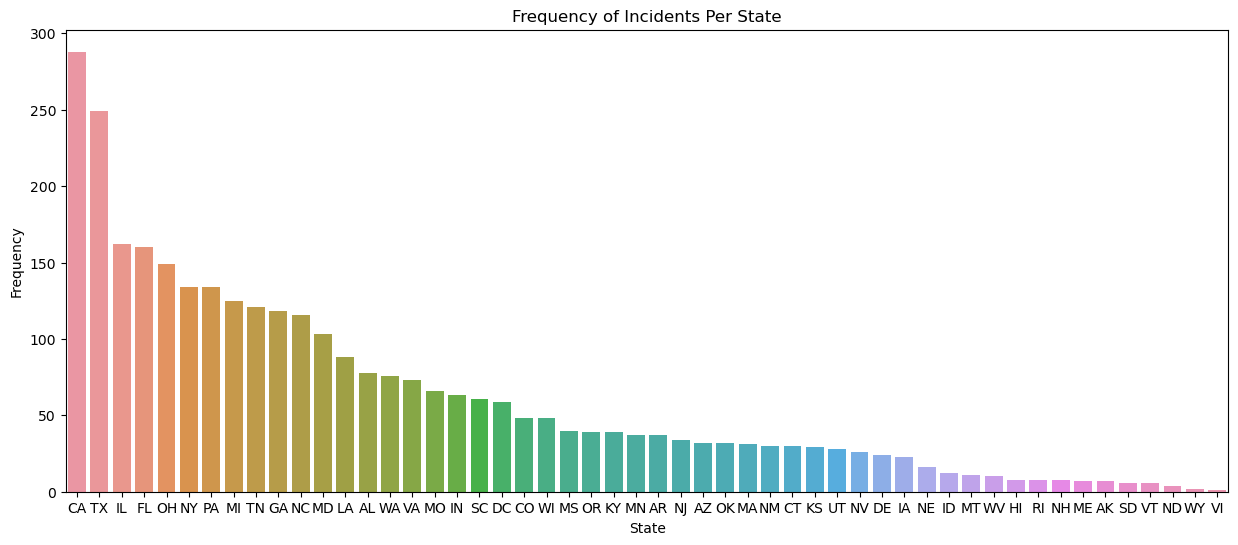

In [17]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

state_incident = incident_shooting_data_df['State'].value_counts().reset_index()
state_incident.columns = ["State", "Frequency"]

plt.figure(figsize=(15, 6))
sns.barplot(x="State", y="Frequency", data=state_incident)
plt.title("Frequency of Incidents Per State")
plt.show()

## Step 2:

Now we can see that California has the most school shootings out of any other state but it also could be the largest. Now I want to explore the ranking based off of square miles and then maybe even on how strict their gun laws are. I can rate them against the Guilford Scale.

In [25]:


county_landmass_df = pd.read_csv("county_landmass.csv")

county_landmass_df

state_sq_mi_total = (county_landmass_df.groupby("state", as_index=False)["sq_mi"].sum())
state_sq_mi_total.columns = ["State", "Total_Square_Miles"]

state_sq_mi_total

,State,Total_Square_Miles
0,Alabama,52419.03
1,Alaska,663267.24
2,Arizona,113998.30
3,Arkansas,53178.62
4,California,163695.58
5,Colorado,104093.58
6,Connecticut,5543.33
7,Delaware,2489.28
8,Florida,65754.59
9,Georgia,59424.80


In [36]:
# Dictionary: Abbreviation -> Full Name 
# Had AI write this to make it easy
us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'DC': 'District of Columbia'
}


state_abbrev = {v: k for k, v in us_state_abbrev.items()}
state_sq_mi_total["State"] = state_sq_mi_total["State"].map(state_abbrev)

merged_summary = pd.merge(
    state_incident,
    state_sq_mi_total,
    on="State",
    how="inner"
)

merged_summary["Incidents_per_1000_sqmi"] = (
    merged_summary["Frequency"] / merged_summary["Total_Square_Miles"] * 1000
)

print(merged_summary.head())

  State  Frequency  Total_Square_Miles  Incidents_per_1000_sqmi
0    CA        288           163695.58                 1.759363
1    TX        249           268580.79                 0.927095
2    IL        162            57914.40                 2.797232
3    FL        160            65754.59                 2.433290
4    OH        149            44824.93                 3.324043


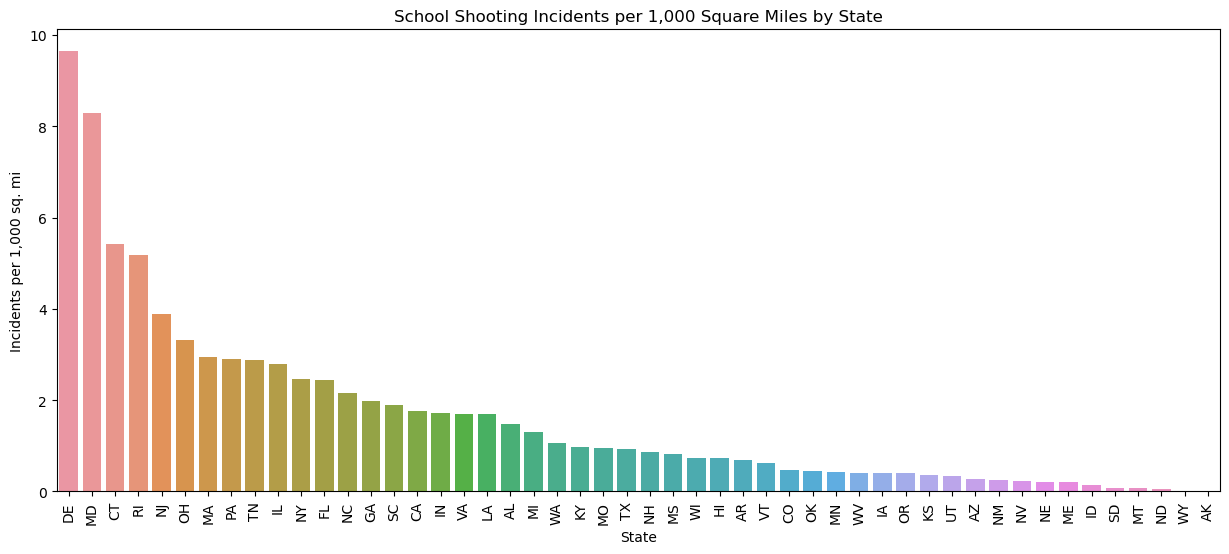

In [38]:
plot_df = merged_summary.sort_values("Incidents_per_1000_sqmi", ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(
    x="State", 
    y="Incidents_per_1000_sqmi", 
    data=plot_df,
)
plt.xticks(rotation=90)
plt.title("School Shooting Incidents per 1,000 Square Miles by State")
plt.xlabel("State")
plt.ylabel("Incidents per 1,000 sq. mi")
plt.show()

In [41]:
import pandas as pd

url = "https://giffords.org/lawcenter/resources/scorecard/"

tables = pd.read_html(url)

scorecard_df = None
for t in tables:
    if "Grade" in t.columns or "Rank" in t.columns:
        scorecard_df = t
        break

giffords_df = scorecard_df[["State", "Grade"]]

state_abbrev = {v: k for k, v in us_state_abbrev.items()}
giffords_df["State"] = giffords_df["State"].map(state_abbrev)

print(giffords_df.head())

  State Grade
0    AL     F
1    AK     F
2    AZ     F
3    AR     F
4    CA     A


/var/folders/yj/8161rznn63bd1qgm7rk8cr8w0000gn/T/ipykernel_40544/1245319112.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giffords_df["State"] = giffords_df["State"].map(state_abbrev)


In [45]:
comparison_df = pd.merge(
    merged_summary,  # your state incident data
    giffords_df,
    on="State",
    how="inner"
)

print(comparison_df.head())

  State  Frequency  Total_Square_Miles  Incidents_per_1000_sqmi Grade
0    CA        288           163695.58                 1.759363     A
1    TX        249           268580.79                 0.927095     F
2    IL        162            57914.40                 2.797232    A-
3    FL        160            65754.59                 2.433290    C-
4    OH        149            44824.93                 3.324043    D-


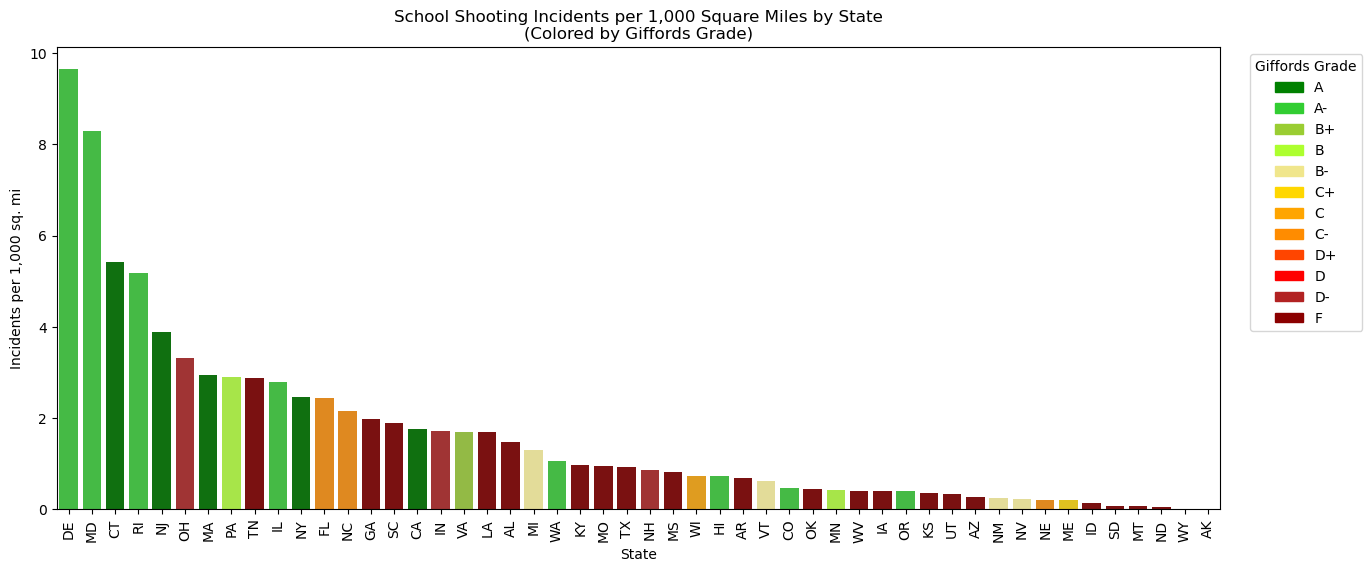

In [51]:
import matplotlib.patches as mpatches


plot_df = comparison_df.sort_values("Incidents_per_1000_sqmi", ascending=False)

# Define a mapping from grades → colors (green to red)
grade_colors = {
    "A": "green", "A-": "limegreen",
    "B+": "yellowgreen", "B": "greenyellow", "B-": "khaki",
    "C+": "gold", "C": "orange", "C-": "darkorange",
    "D+": "orangered", "D": "red", "D-": "firebrick",
    "F": "darkred"
}

# Map each state's grade to a color
plot_df["Color"] = plot_df["Grade"].map(grade_colors)

# Plot bar chart with custom colors
plt.figure(figsize=(15,6))
sns.barplot(
    x="State", 
    y="Incidents_per_1000_sqmi", 
    data=plot_df,
    palette=plot_df["Color"]  # use grade-based colors
)
plt.xticks(rotation=90)
plt.title("School Shooting Incidents per 1,000 Square Miles by State\n(Colored by Giffords Grade)")
plt.xlabel("State")
plt.ylabel("Incidents per 1,000 sq. mi")

# Build custom legend
legend_patches = [mpatches.Patch(color=color, label=grade) for grade, color in grade_colors.items()]
plt.legend(handles=legend_patches, title="Giffords Grade", bbox_to_anchor=(1.02, 1), loc="upper left")


plt.show()


## Findings

Okay so... there isn't much correlation between the gun laws and frequency of shootings.

Now I want to look deeper into Weapons

In [5]:
import pandas as pd

incident_weapon_data_df = pd.read_excel("Public v4.1 K-12 School Shooting Database (8 28 2025).xlsx", sheet_name = 'Weapon')

incident_weapon_data_df

,Incident_ID,Weapon_Type,Weapon_Caliber,Weapon_Details
0,20250827MNANM,Rifle,.223 caliber,NaN
1,20250827MNANM,Shotgun,12 gauge,NaN
2,20250827MNANM,Handgun,NaN,NaN
3,20250826MNCRM,Rifle,.223 caliber,AR-15 rifle
4,20250822ILMAP,Handgun,NaN,NaN
...,...,...,...,...
3163,20000224OKTET,Handgun,NaN,NaN
3164,20000222MSHOH,Handgun,NaN,NaN
3165,19991103MADOB,Handgun,.32 caliber,NaN
3166,20030922MNJOR,Other,NaN,Replica handgun with real magazine


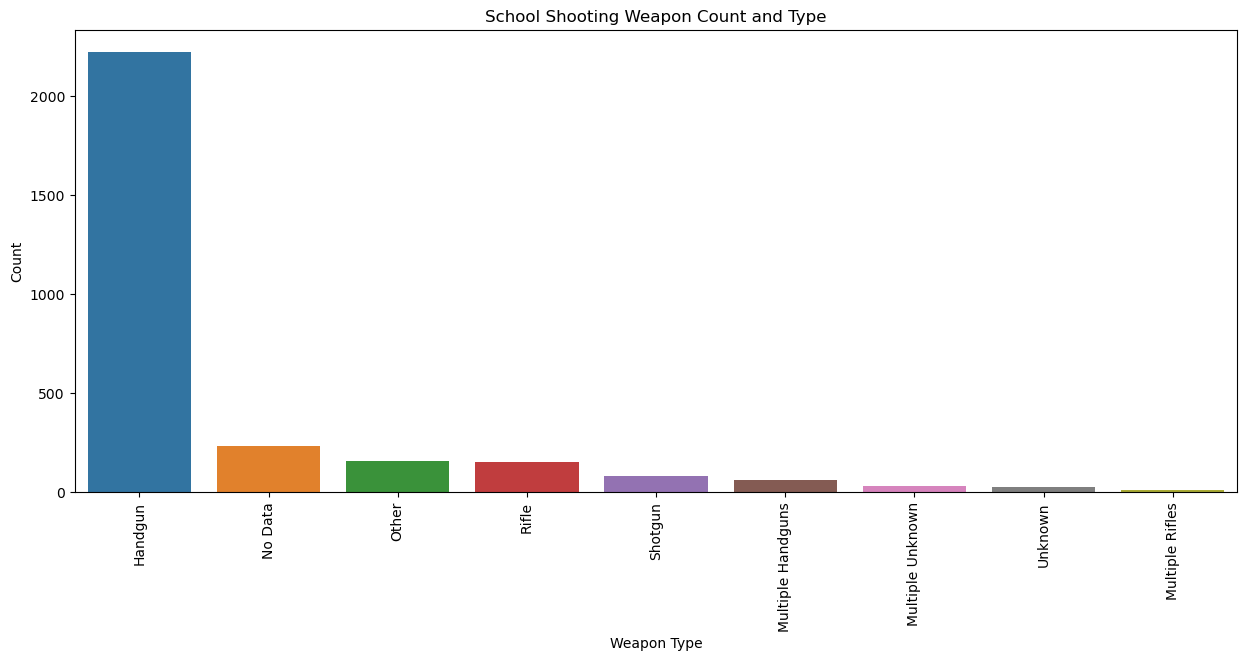

In [11]:
# graphing out the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Count occurrences of each weapon type
weapon_counts = incident_weapon_data_df["Weapon_Type"].value_counts().reset_index()
weapon_counts.columns = ["Weapon_Type", "Count"]

# Plot bar chart
sns.barplot(
    x="Weapon_Type", 
    y="Count", 
    data=weapon_counts
)

plt.xticks(rotation=90)
plt.title("School Shooting Weapon Count and Type")
plt.xlabel("Weapon Type")
plt.ylabel("Count")
plt.show()

Lots of shootings use handguns... where did they get them from 

# Was it planned? Let'd find out.

In [14]:
import pandas as pd

incident_shooting_data_df = pd.read_excel("Public v4.1 K-12 School Shooting Database (8 28 2025).xlsx", sheet_name = 'Incident')

incident_shooting_data_df.head()


,Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,...,Preplanned,SRO_School,Security_Screening,Screening_Outcome,Shots_Fired,School_Lockdown,LAT,LNG,Campus_Type,Zipcode
0,20250827MNANM,8,27,2025,2025-08-27,Annunciation Catholic School,2,17,19,1,...,Yes,No,NaN,Outside/Off-Property,99,Yes,44.904590,-93.286622,Multiple detached buildings,55419
1,20250826MNCRM,8,26,2025,2025-08-26,Cristo Rey Jesuit High School,1,6,7,0,...,No,NaN,NaN,Outside/Off-Property,30,No,44.950010,-93.271548,Urban Street Standalone,55408
2,20250822ILMAP,8,22,2025,2025-08-22,Manual High School,0,0,0,0,...,No,NaN,NaN,Outside/Off-Property,99,Yes,40.679481,-89.633994,Multiple attached buildings,61605
3,20250822KYMAM,8,22,2025,2025-08-22,Mayfield High School,0,1,1,0,...,No,NaN,NaN,Outside/Off-Property,99,No,36.730095,-88.626894,Multiple attached buildings,42066
4,20250820TNRIM,8,20,2025,2025-08-20,Riverview Middle School,0,0,0,0,...,No,NaN,NaN,NaN,99,NaN,35.096211,-90.070873,Single building indoor hallway,38109


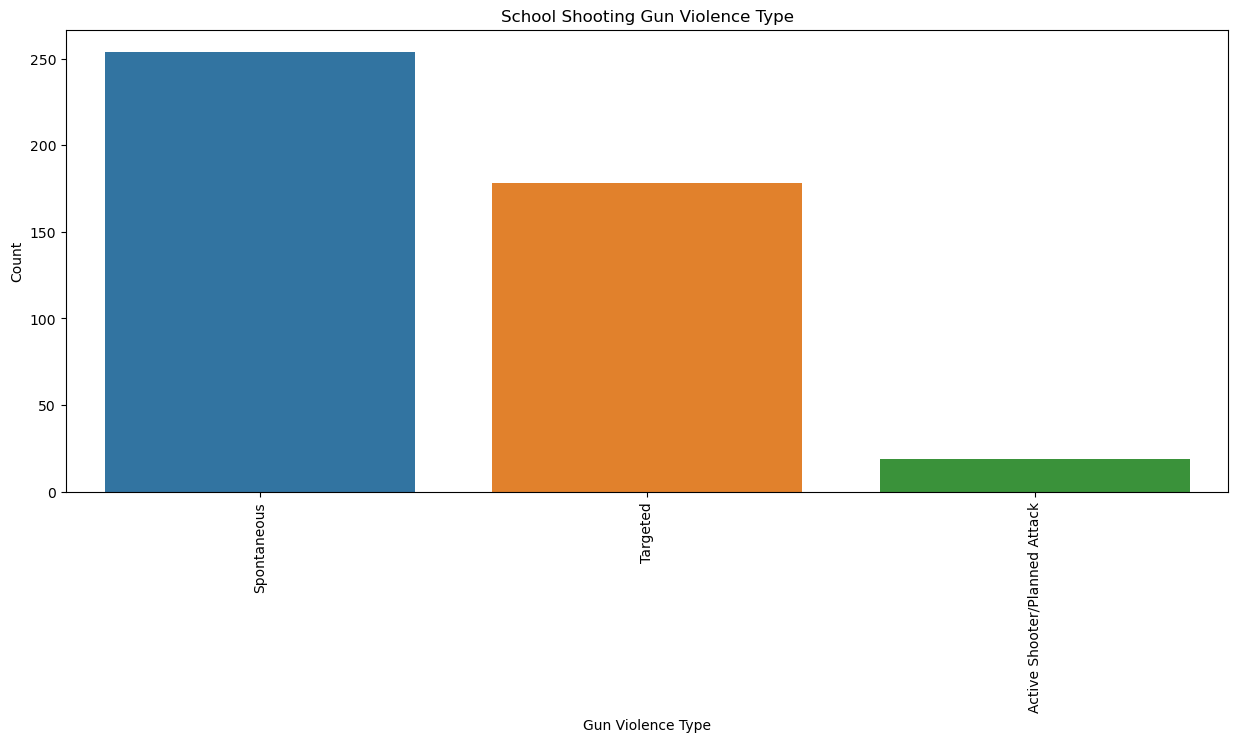

In [16]:
# graphing out the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Count occurrences of each weapon type
gv_counts = incident_shooting_data_df["GV_Type"].value_counts().reset_index()
gv_counts.columns = ["GV_Type", "Count"]

# Plot bar chart
sns.barplot(
    x="GV_Type", 
    y="Count", 
    data=gv_counts
)

plt.xticks(rotation=90)
plt.title("School Shooting Gun Violence Type")
plt.xlabel("Gun Violence Type")
plt.ylabel("Count")
plt.show()

This took me offguard... I was thinking 'Targeted' would win by a long mile but I was wrong. This reminded me that this databasae is full of any shooting that occured on a campus... so could be gang related and when fights break out... less alone one planned attacker. Probably a good idea to look at county and average income??

I also think I want to look specifically at Targeted accounts because spontaneous is much harder to predict and stop. Whereas, when it's targeted, the attacker has made mulitple choices that lead up to that point. 

In [26]:

targeted_incident_shooting_data_df = incident_shooting_data_df[
    incident_shooting_data_df['GV_Type'] == 'Targeted'
]


targeted_incident_shooting_data_df

,Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,...,Preplanned,SRO_School,Security_Screening,Screening_Outcome,Shots_Fired,School_Lockdown,LAT,LNG,Campus_Type,Zipcode
1,20250826MNCRM,8,26,2025,2025-08-26,Cristo Rey Jesuit High School,1,6,7,0,...,No,NaN,NaN,Outside/Off-Property,30,No,44.950010,-93.271548,Urban Street Standalone,55408
2,20250822ILMAP,8,22,2025,2025-08-22,Manual High School,0,0,0,0,...,No,NaN,NaN,Outside/Off-Property,99,Yes,40.679481,-89.633994,Multiple attached buildings,61605
6,20250820ARROL,8,20,2025,2025-08-20,Rockefeller Early Childhood Center,1,0,1,0,...,No,No,NaN,Outside/Off-Property,1,Yes,34.731889,-92.265251,Single building indoor hallway,72206
9,20250814GAMEN,8,14,2025,2025-08-14,Meadowcreek Elementary School,0,0,0,0,...,No,NaN,NaN,Failed,1,No,33.921259,-84.166024,Single building indoor hallway,30093
12,20250731WAPIV,7,31,2025,2025-07-31,Pioneer Elementary School,0,1,1,0,...,No,NaN,NaN,Outside/Off-Property,2,No,45.676007,-122.500430,Single building indoor hallway,98682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,19940124SCEAC,1,24,1994,1994-01-24,Eau Claire High School,1,0,1,0,...,No,NaN,Unknown,NaN,NaN,NaN,34.048108,-81.042640,NaN,29203
2576,19931217MICHC,12,17,1993,1993-12-17,Chelsea High School,1,2,3,0,...,No,NaN,Unknown,NaN,NaN,NaN,42.311387,-84.002362,NaN,48118
2708,19900124MIFID,1,24,1990,1990-01-24,Finney High School,0,1,1,0,...,No,NaN,NaN,NaN,NaN,NaN,42.389865,-82.953782,NaN,48215
2710,19900105FLCRC,1,5,1990,1990-01-05,Crystal River Middle School,0,0,0,0,...,No,NaN,NaN,NaN,0,No,28.906764,-82.578524,Multiple detached buildings,34428


In [29]:


# 2) Keep only the incident IDs we care about
targeted_ids = targeted_incident_shooting_data_df[['Incident_ID']].drop_duplicates()

# 3) Inner-join with the weapons table on Incident_ID
#    (rename columns below if yours differ)
weapons_targeted_df = incident_weapon_data_df.merge(
    targeted_ids, on='Incident_ID', how='inner'
)

# 4) (Optional) If a weapon can appear multiple times per incident and you only
#    want to count it once per incident, deduplicate:
# weapons_targeted_df = weapons_targeted_df.drop_duplicates(['Incident_ID','Weapon_Type'])

# 5) Count weapons used in targeted incidents
weapon_counts = (weapons_targeted_df['Weapon_Type']
                 .value_counts()
                 .reset_index()
                 .rename(columns={'index':'Weapon_Type', 'Weapon_Type':'Count'}))

# 6) Plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Weapon_Type', y='Count', data=weapon_counts)
plt.xticks(rotation=90)
plt.title('Weapons Used in Targeted Incidents')
plt.xlabel('Weapon Type')
plt.ylabel('Count')
plt.show()


ValueError: Could not interpret input 'Weapon_Type'

<Figure size 1500x600 with 0 Axes>